In [1]:
#import sys
#!{sys.executable} -m pip install sktime

In [2]:
#pip install sktime[all_extras]

In [3]:
#import sys
#!{sys.executable} -m pip install sklearn

In [4]:
#import sys
#!{sys.executable} -m pip install seaborn

In [5]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series
import seaborn

In [6]:
y = load_lynx()
y

Period
1821     269.0
1822     321.0
1823     585.0
1824     871.0
1825    1475.0
         ...  
1930     662.0
1931    1000.0
1932    1590.0
1933    2657.0
1934    3396.0
Freq: A-DEC, Name: Number of Lynx trappings, Length: 114, dtype: float64

In [7]:
y.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 114 entries, 1821 to 1934
Freq: A-DEC
Series name: Number of Lynx trappings
Non-Null Count  Dtype  
--------------  -----  
114 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of Lynx trappings'>)

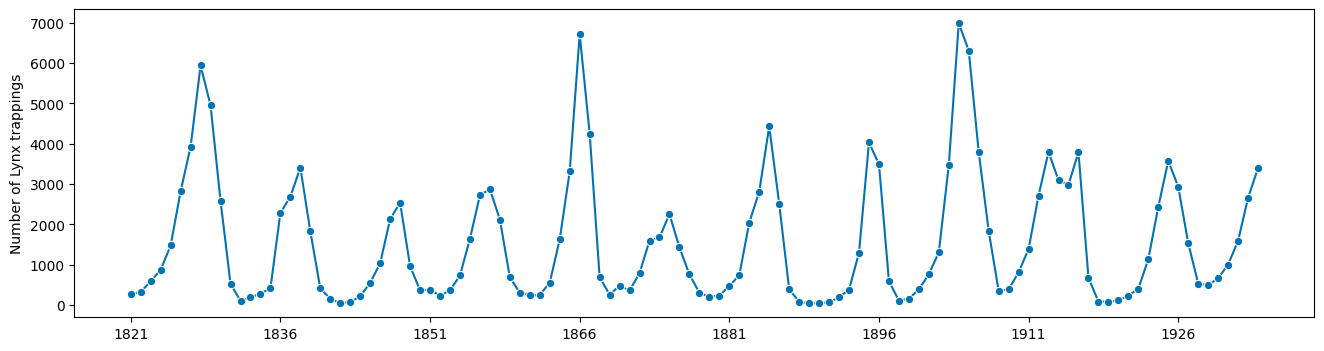

In [8]:
plot_series(y)

# Naive forecast

In [9]:
## Data
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series
y = load_shampoo_sales()
y

Period
1991-01    266.0
1991-02    145.9
1991-03    183.1
1991-04    119.3
1991-05    180.3
1991-06    168.5
1991-07    231.8
1991-08    224.5
1991-09    192.8
1991-10    122.9
1991-11    336.5
1991-12    185.9
1992-01    194.3
1992-02    149.5
1992-03    210.1
1992-04    273.3
1992-05    191.4
1992-06    287.0
1992-07    226.0
1992-08    303.6
1992-09    289.9
1992-10    421.6
1992-11    264.5
1992-12    342.3
1993-01    339.7
1993-02    440.4
1993-03    315.9
1993-04    439.3
1993-05    401.3
1993-06    437.4
1993-07    575.5
1993-08    407.6
1993-09    682.0
1993-10    475.3
1993-11    581.3
1993-12    646.9
Freq: M, Name: Number of shampoo sales, dtype: float64

In [10]:
y.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 36 entries, 1991-01 to 1993-12
Freq: M
Series name: Number of shampoo sales
Non-Null Count  Dtype  
--------------  -----  
36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

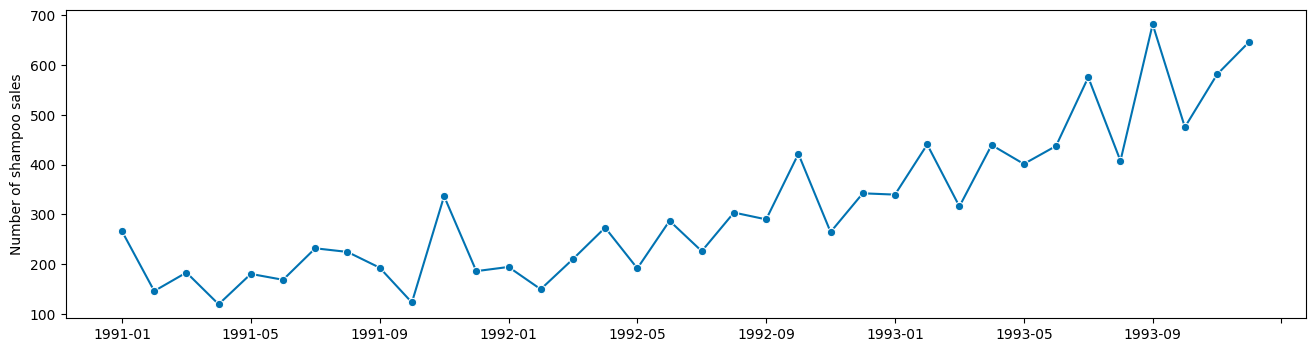

In [11]:
plot_series(y)

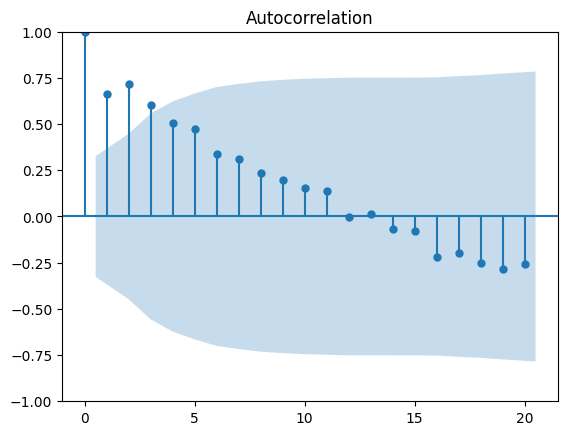

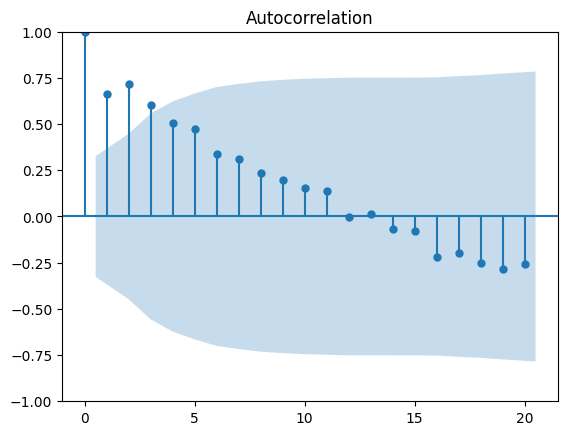

In [12]:
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y, lags=20)


## Specify the forecasting horizon (we need to pass that to our forecasting algorithm)

There are two main ways:

Method 1: Using a numpy.array of integers. This assumes either integer index or periodic index (PeriodIndex) in the time series; the integer indicates the number of time points or periods ahead we want to make a forecast for. E.g., 1 means forecast the next period, 2 the second next period, and so on.

Method 2: Using a ForecastingHorizon object. This can be used to define forecast horizons, using any supported index type as an argument. No periodic index is assumed.

In [13]:
## Step 2- Define forecast horizon 
# - To specify the forecasting horizon as a numpy array of the steps ahead relative to the end of the training series:
# method 1- using an array of values
import numpy as np

fh = np.arange(6) + 1
fh

array([1, 2, 3, 4, 5, 6])

In [14]:
# method 2 - Using the ForecastingHorizon object
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(
    pd.period_range("1993-07", periods=6, freq="M"), is_relative=False
)
fh

ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)

Forecasting horizons can be absolute, i.e., referencing specific time points in the future, or relative, i.e., referencing time differences to the present. 

`numpy.array` based forecasting horizons are always relative.

`ForecastingHorizon` objects can be both relative and absolute. In particular, absolute forecasting horizons can only be specified using ForecastingHorizon.

ForecastingHorizon-s can be converted from relative to absolute and back via the to_relative and to_absolute methods. Both of these conversions require a compatible cutoff to be passed:

In [15]:
cutoff = pd.Period("1993-06", freq="M")
cutoff

Period('1993-06', 'M')

In [16]:
fh.to_relative(cutoff)

ForecastingHorizon([1, 2, 3, 4, 5, 6], dtype='int64', is_relative=True)

In [17]:
fh.to_absolute(cutoff)

ForecastingHorizon(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]', is_relative=False)

In [18]:
## Step 3- SPlit data into training and test
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

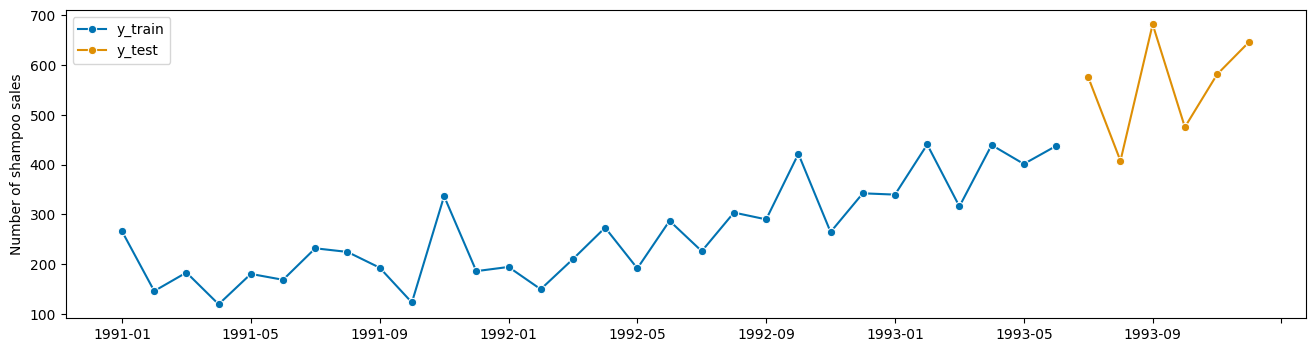

In [19]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

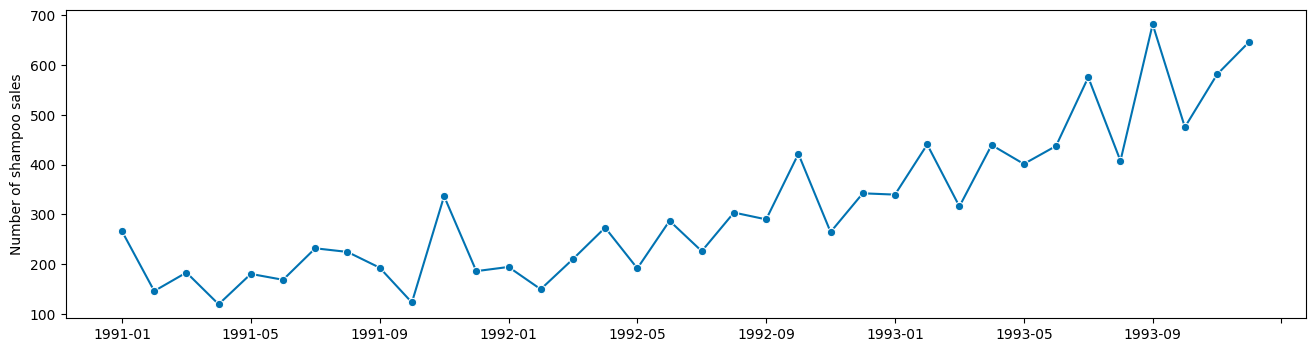

In [20]:
plot_series(y) # full series

# Naive forecast - Model Specification

https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.naive.NaiveForecaster.html


In [21]:
# specify the forecasting algorithm
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last", sp=1)

In [22]:
NaiveForecaster?

In [23]:
# fitting the forecaster - Fit forecaster to training data.
forecaster.fit(y_train)

NaiveForecaster()

In [24]:
#querying predictions
y_pred = forecaster.predict(fh)
y_pred

1993-07    437.4
1993-08    437.4
1993-09    437.4
1993-10    437.4
1993-11    437.4
1993-12    437.4
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

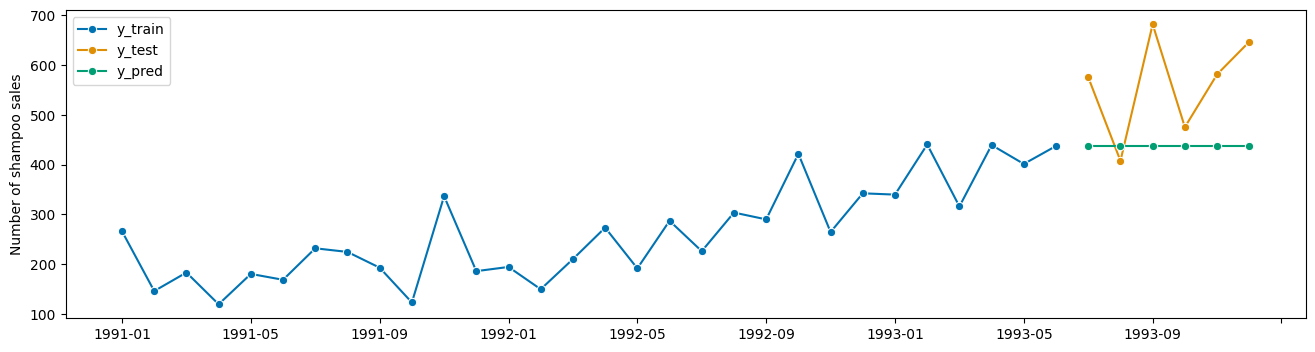

In [25]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# Evaluation

In [26]:
from sktime.performance_metrics.forecasting import \
    mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

0.2204778492362743

In [27]:
## Mean forecast
forecaster_m = NaiveForecaster(strategy="mean")
forecaster_m.fit(y_train)
y_pred_m = forecaster_m.predict(fh)
y_pred_m


1993-07    262.833333
1993-08    262.833333
1993-09    262.833333
1993-10    262.833333
1993-11    262.833333
1993-12    262.833333
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

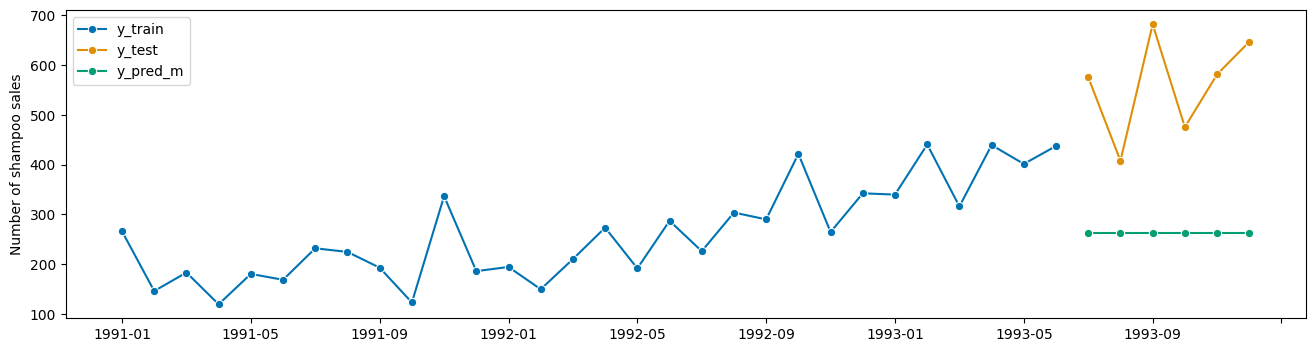

In [28]:
plot_series(y_train, y_test, y_pred_m, labels=["y_train", "y_test", "y_pred_m"])

In [29]:
mean_absolute_percentage_error(y_test, y_pred_m, symmetric=False)

0.5169416281086144

In [30]:
## Drift forecast
forecaster_d = NaiveForecaster(strategy="drift", window_length=10)
forecaster_d.fit(y_train)
y_pred_d = forecaster_d.predict(fh)
y_pred_d


1993-07    453.788889
1993-08    470.177778
1993-09    486.566667
1993-10    502.955556
1993-11    519.344444
1993-12    535.733333
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

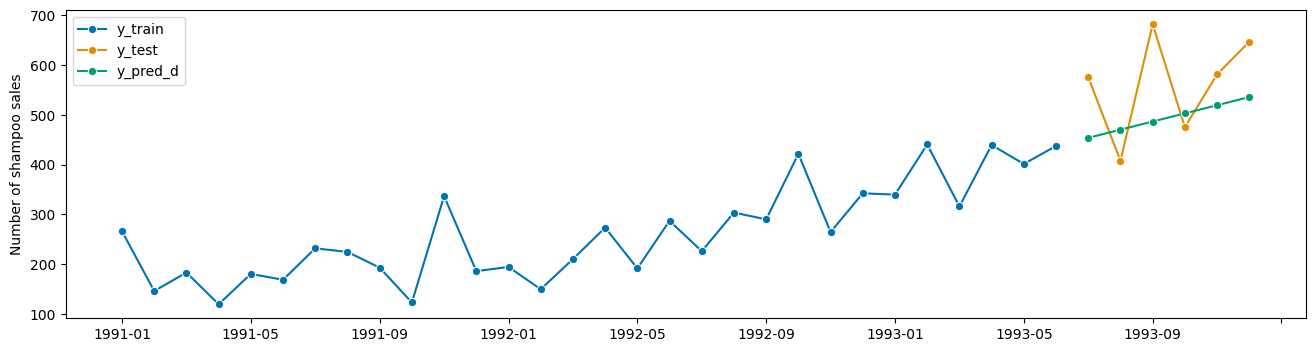

In [31]:
plot_series(y_train, y_test, y_pred_d, labels=["y_train", "y_test", "y_pred_d"])

In [32]:
# seasonal naive
forecaster_sn = NaiveForecaster(strategy="last", sp=12)
forecaster_sn.fit(y_train)
y_pred_sn = forecaster_sn.predict(fh)
y_pred_sn


1993-07    226.0
1993-08    303.6
1993-09    289.9
1993-10    421.6
1993-11    264.5
1993-12    342.3
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

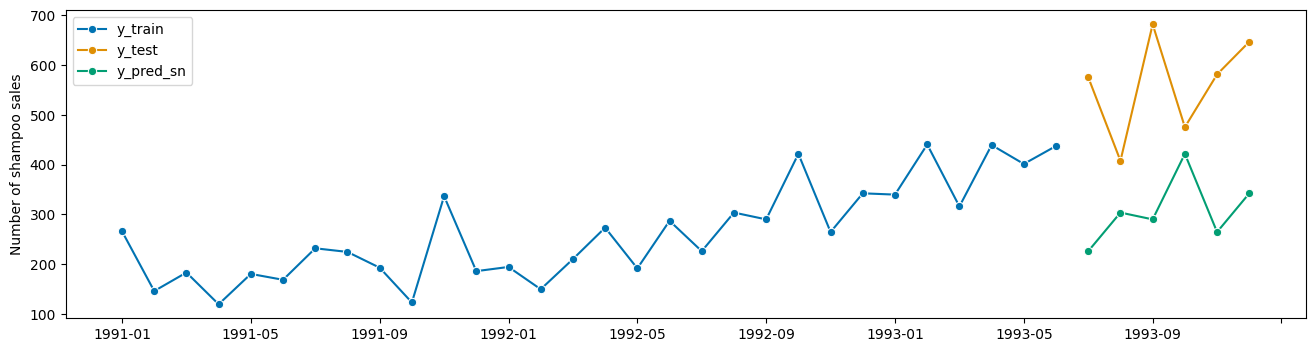

In [33]:
plot_series(y_train, y_test, y_pred_sn, labels=["y_train", "y_test", "y_pred_sn"])

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of shampoo sales'>)

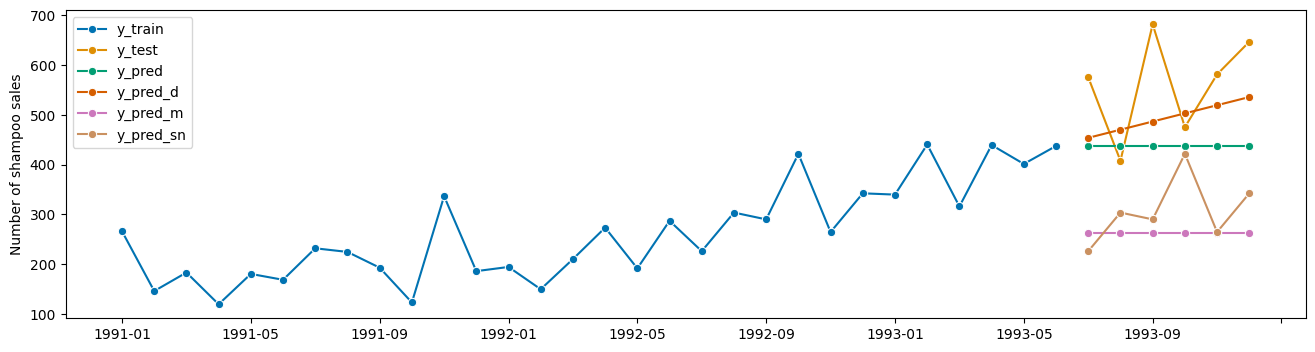

In [34]:
plot_series(y_train, y_test, y_pred, y_pred_d, y_pred_m, y_pred_sn, labels=["y_train", "y_test", "y_pred","y_pred_d", "y_pred_m", "y_pred_sn"])

In [35]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)


0.42770074666298047

In [36]:
mean_absolute_percentage_error(y_test, y_pred_d, symmetric=False)


0.16469764622516225

In [37]:
mean_absolute_percentage_error(y_test, y_pred_m, symmetric=False)


0.5169416281086144

In [39]:
mean_absolute_percentage_error(y_test, y_pred_sn, symmetric=False)

0.42770074666298047

Your Turn: Forecast AirPassenger dataset.